In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

city_df = pd.read_csv("data/city_data.csv")
ride_df = pd.read_csv("data/ride_data.csv")
main_df = pd.merge(ride_df, city_df, how='left', on='city')
main_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


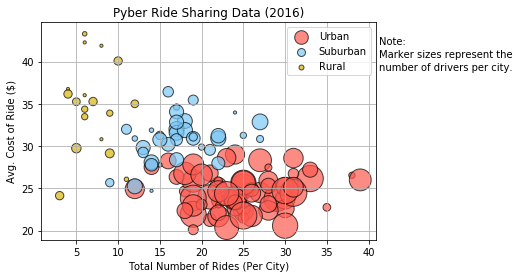

In [2]:
urban_df = main_df[main_df['type'] == "Urban"]
urban_sort = urban_df.groupby('city')
urban_x = urban_sort['ride_id'].count()
urban_y = urban_sort['fare'].mean()
urban_z = urban_sort['driver_count'].mean()

suburb_df = main_df[main_df['type'] == "Suburban"]
suburb_sort = suburb_df.groupby('city')
suburb_x = suburb_sort['ride_id'].count()
suburb_y = suburb_sort['fare'].mean()
suburb_z = suburb_sort['driver_count'].mean()

rural_df = main_df[main_df['type'] == "Rural"]
rural_sort = rural_df.groupby('city')
rural_x = rural_sort['ride_id'].count()
rural_y = rural_sort['fare'].mean()
rural_z = rural_sort['driver_count'].mean()

ax1 = plt.scatter(urban_x, urban_y, s=urban_z*10, 
                  facecolors='xkcd:coral', edgecolors='black', alpha=.7, label="Urban")
ax2 = plt.scatter(suburb_x, suburb_y, s=suburb_z*10, 
                  facecolors='xkcd:lightblue', edgecolors='black', alpha=.7, label="Suburban")
ax3 = plt.scatter(rural_x, rural_y, s=rural_z*10,
                  facecolors='xkcd:gold', edgecolors='black', alpha=.7, label="Rural")
plt.title('Pyber Ride Sharing Data (2016)')
plt.ylabel('Avg. Cost of Ride ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.text(41.2, 42, "Note:")
plt.text(41.2, 40.5, "Marker sizes represent the")
plt.text(41.2, 39, "number of drivers per city.")
plt.grid()
plt.legend(handles=[ax1, ax2, ax3], loc="best", markerscale=.7)
plt.show()

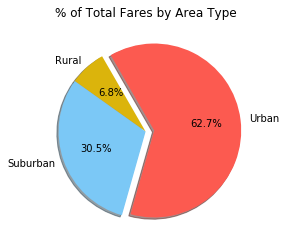

In [24]:
types = ['Rural', 'Suburban', 'Urban']
explode = [0, 0, .1]
colors = ['xkcd:gold', 'xkcd:lightblue', 'xkcd:coral']
type_sort = main_df.groupby('type')
fare_sum = type_sort.fare.sum()
fare_sum.sort_values(ascending=False)
plt.pie(fare_sum, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("% of Total Fares by Area Type")
plt.show()

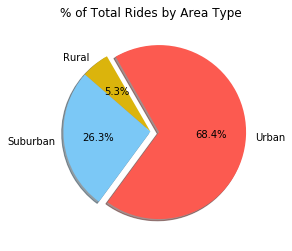

In [4]:
types = ['Rural', 'Suburban', 'Urban']
explode = [0, 0, .1]
colors = ['xkcd:gold', 'xkcd:lightblue', 'xkcd:coral']
type_sort = main_df.groupby('type')
fare_count = type_sort.fare.count()
fare_count.sort_values(ascending=False)
plt.pie(fare_count, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("% of Total Rides by Area Type")
plt.show()

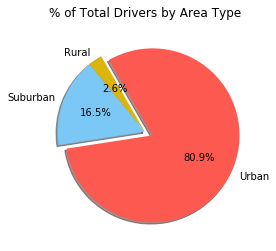

In [18]:
types = ['Rural', 'Suburban', 'Urban']
explode = [0, 0, .1]
colors = ['xkcd:gold', 'xkcd:lightblue', 'xkcd:coral']
type_city_sort = city_df.groupby('type')
drivers_count = type_city_sort['driver_count'].sum()
plt.pie(drivers_count, explode=explode, labels=types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("% of Total Drivers by Area Type")
plt.show()